In [165]:
pip install gudhi

In [166]:
#inicialicemos nuestro notebook
import numpy as np #La mayoria de las funciones requieren de entradas en forma de arreglos
import pandas as pd #Para trabajar con bases de datos
import matplotlib.pyplot as plt #Para graficar
from matplotlib import cm#Para manejar colores
from scipy.spatial.distance import squareform,pdist#Para calcular matrices de distancias y hacer inferencia de los
import matplotlib.patches as mpatches#Para hacer elipses
from matplotlib.collections import PatchCollection #Para hacer elipse
import gudhi#Para hacer la filtracion de complejos simpliciales de Rips y Alpha

Vamos a trabajar con una base datos peque;a de puntos en plano. La idea es que veas como interpretar el arbol de simplejos

In [167]:
data=pd.read_csv('Activity1.csv')
data=data.rename(columns={'0':'a',"1":'b'})
data2=pd.read_csv('Activity2.csv')
data2=data2.rename(columns={'0':'a',"1":'b'})
data3=pd.read_csv('Activity3.csv')
data3=data3.rename(columns={'0':'a',"1":'b'})

## Datos Actividad 1

           a         b
0  -0.062332 -0.990463
1   1.109356 -0.077222
2   0.553080 -0.938321
3   0.290183  0.813677
4  -0.722770 -0.380330
..       ...       ...
95  0.941756 -0.420209
96 -1.094436 -0.256210
97  0.892490 -0.445924
98 -0.290220  0.867121
99  0.096652 -1.144156

[100 rows x 2 columns]


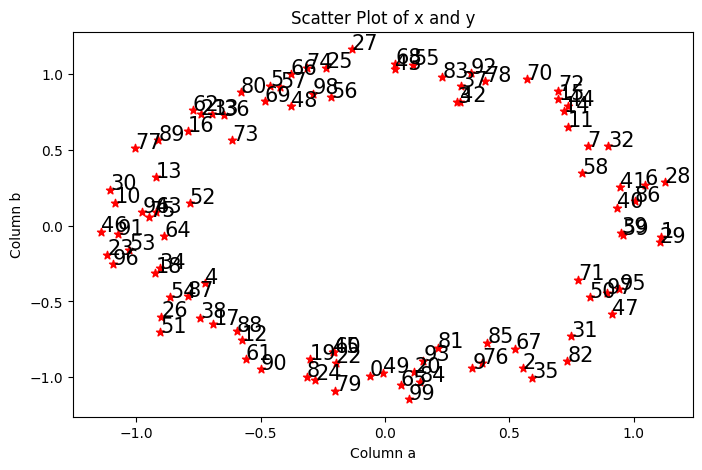

In [168]:
print(data)
#Grafiquemos los datos
plt.figure(figsize=(8,5))
plt.scatter(data['a'],data['b'],c='r',marker='*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a,j.b), fontsize=15)


In [169]:
#Calculemos la matriz de Distancias Eclidianas

dist=pd.DataFrame(squareform(pdist(data[["a","b"]]),'euclidean'),columns=data.index.values, index=data.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,1.485551,0.617617,1.838258,0.899133,1.953101,1.675884,1.746904,0.251628,0.415931,...,0.439108,1.377628,2.035153,0.238751,1.412562,1.154722,1.266636,1.099185,1.871510,0.221128
1,1.485551,0.000000,1.025151,1.210266,1.857029,1.861869,0.350995,0.666535,1.693717,1.148452,...,1.828640,2.183543,1.324574,1.253893,2.092554,0.381746,2.211048,0.427753,1.688370,1.471026
2,0.617617,1.025151,0.000000,1.771613,1.392533,2.118670,1.302420,1.482042,0.868867,0.202658,...,1.052383,1.851240,1.953305,0.402207,1.841215,0.647695,1.783139,0.598041,1.992680,0.500694
3,1.838258,1.210266,1.771613,0.000000,1.565799,0.759963,0.931277,0.600631,1.907239,1.753888,...,1.929427,1.617595,0.197498,1.708330,1.461027,1.395358,1.749808,1.396198,0.582859,1.967375
4,0.899133,1.857029,1.392533,1.565799,0.000000,1.327453,1.882518,1.781682,0.738533,1.209981,...,0.609013,0.478495,1.747378,1.013645,0.531153,1.665004,0.391843,1.616591,1.320315,1.120216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.154722,0.381746,0.647695,1.395358,1.665004,1.941771,0.695625,0.949291,1.381125,0.786766,...,1.534243,2.048568,1.544391,0.916899,1.984259,0.000000,2.042786,0.055574,1.781848,1.112789
96,1.266636,2.211048,1.783139,1.749808,0.391843,1.336528,2.202346,2.060810,1.074972,1.598143,...,0.911705,0.201778,1.912102,1.399637,0.361985,2.042786,0.000000,1.995962,1.381533,1.485644
97,1.099185,0.427753,0.598041,1.396198,1.616591,1.924638,0.729730,0.969574,1.325628,0.732893,...,1.479161,2.004957,1.550017,0.861417,1.943547,0.055574,1.995962,0.000000,1.767170,1.058718
98,1.871510,1.688370,1.992680,0.582859,1.320315,0.180234,1.463273,1.157728,1.862635,1.916541,...,1.825976,1.210617,0.648617,1.811605,1.039881,1.781848,1.381533,1.767170,0.000000,2.048146


In [170]:
#Calculas la filtracion de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points=data[['a', 'b']].values, max_edge_length=20.0)

In [171]:
#Generamos el arbol de complejos simpliciales e imprimimos la informacion
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' +repr(simplex_tree.dimension())+'-'+\
    repr(simplex_tree.num_simplices())+' simplices -' +\
    repr(simplex_tree.num_vertices())+'vertices.'
print(result_str)
fmt='%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[51, 66, 99] -> 2.19
[52, 66, 99] -> 2.19
[53, 66, 99] -> 2.19
[54, 66, 99] -> 2.19
[56, 66, 99] -> 2.19
[57, 66, 99] -> 2.19
[58, 66, 99] -> 2.19
[59, 66, 99] -> 2.19
[60, 66, 99] -> 2.19
[61, 66, 99] -> 2.19
[62, 66, 99] -> 2.19
[63, 66, 99] -> 2.19
[64, 66, 99] -> 2.19
[65, 66, 99] -> 2.19
[66, 67, 99] -> 2.19
[66, 69, 99] -> 2.19
[66, 70, 99] -> 2.19
[66, 71, 99] -> 2.19
[66, 72, 99] -> 2.19
[66, 73, 99] -> 2.19
[66, 75, 99] -> 2.19
[66, 76, 99] -> 2.19
[66, 77, 99] -> 2.19
[66, 78, 99] -> 2.19
[66, 79, 99] -> 2.19
[66, 80, 99] -> 2.19
[66, 81, 99] -> 2.19
[66, 82, 99] -> 2.19
[66, 83, 99] -> 2.19
[66, 84, 99] -> 2.19
[66, 85, 99] -> 2.19
[66, 86, 99] -> 2.19
[66, 87, 99] -> 2.19
[66, 88, 99] -> 2.19
[66, 89, 99] -> 2.19
[66, 90, 99] -> 2.19
[66, 91, 99] -> 2.19
[66, 92, 99] -> 2.19
[66, 93, 99] -> 2.19
[66, 94, 99] -> 2.19
[66, 95, 99] -> 2.19
[66, 96, 99] -> 2.19
[66, 97, 99] -> 2.19
[66, 98, 99] -> 2.19
[82, 89] 

In [172]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


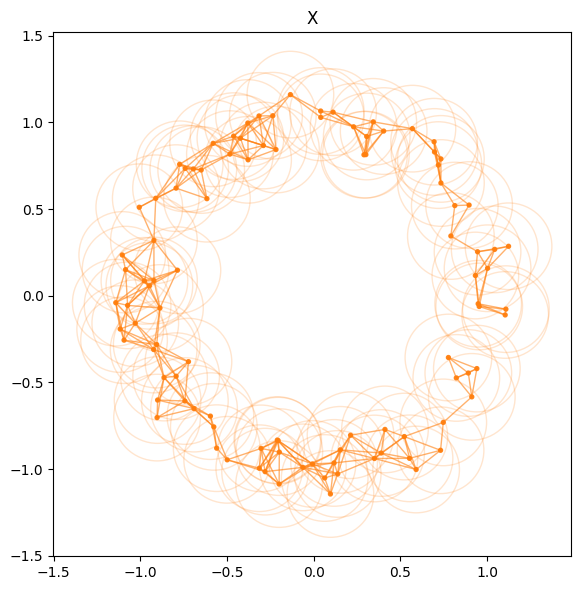

In [173]:
X = data[['a', 'b']].values
plot_rips_complex(X, R=0.25,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


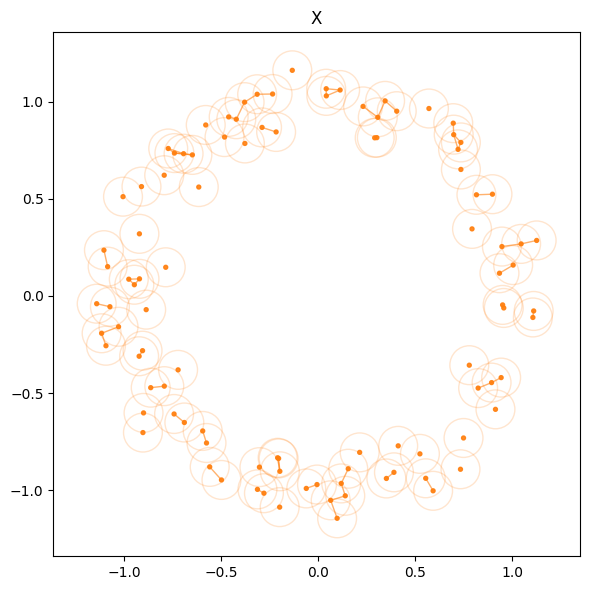

In [174]:
X = data[['a', 'b']].values
plot_rips_complex(X, R=0.1,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


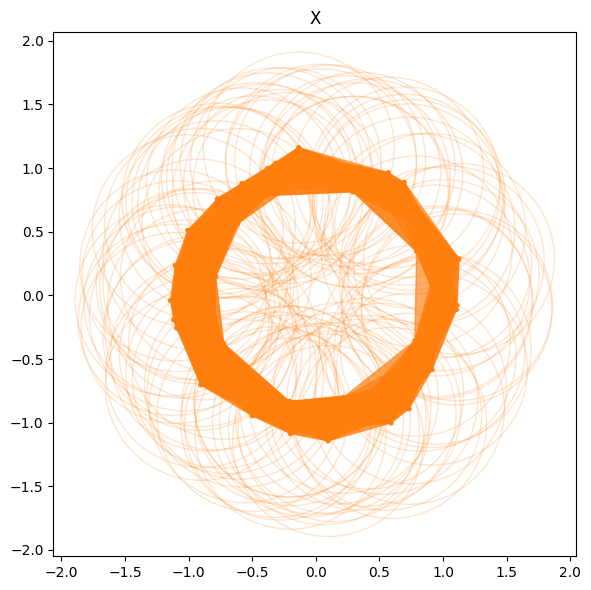

In [175]:
X = data[['a', 'b']].values
plot_rips_complex(X, R=0.75,label='X',maxdim=2)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


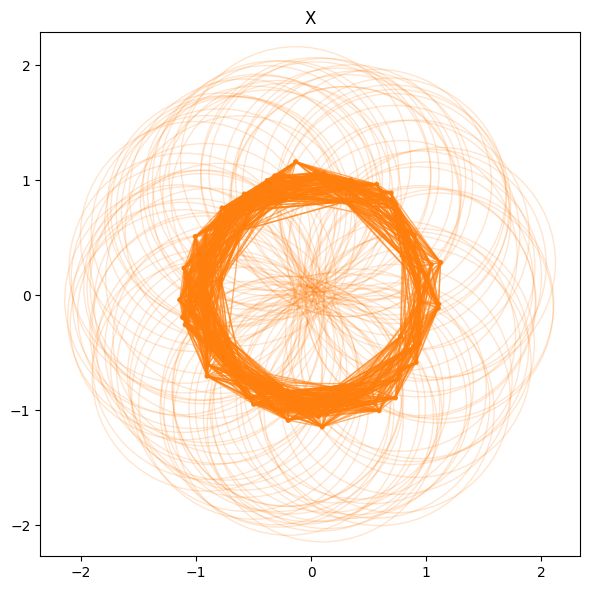

In [176]:
X = data[['a', 'b']].values
plot_rips_complex(X, R=1,label='X',maxdim=1)

### Alpha

In [177]:
#Calculamos la fitltración de Alpha
points = data[['a', 'b']].values
alpha_complex = gudhi.AlphaComplex(points)

#Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = alpha_complex.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 - 557 simplices - 100 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.

## Datos Actividad 2

           a         b
0   1.727350  0.285771
1   1.861161  0.597764
2   0.627520  1.497373
3   0.979559  0.008873
4   0.756204  0.536461
..       ...       ...
95  0.803505  0.056748
96  0.793846 -0.350394
97  1.372076 -0.313612
98  0.730844 -0.348970
99  1.028700  1.126591

[100 rows x 2 columns]


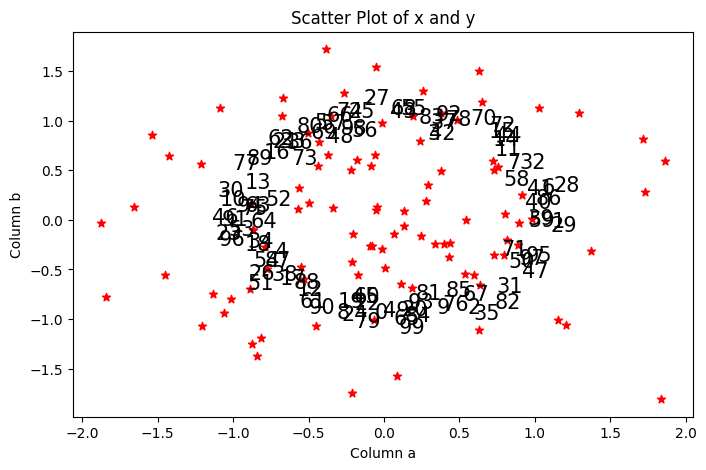

In [178]:
print(data2)
#Grafiquemos los datos
plt.figure(figsize=(8,5))
plt.scatter(data2['a'],data2['b'],c='r',marker='*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a,j.b), fontsize=15)


In [179]:
#Calculemos la matriz de Distancias Eclidianas

dist=pd.DataFrame(squareform(pdist(data2[["a","b"]]),'euclidean'),columns=data2.index.values, index=data2.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.339478,1.636339,0.797410,1.002980,1.219369,0.811375,1.438593,0.527756,1.363058,...,2.477545,0.887711,1.408473,0.997360,2.097195,0.951810,1.129662,0.696764,1.181491,1.093202
1,0.339478,0.000000,1.526815,1.060195,1.106656,1.448557,1.006970,1.436712,0.257549,1.484403,...,2.802076,1.150206,1.710089,1.292399,2.406674,1.187996,1.427643,1.034317,1.474422,0.986229
2,1.636339,1.526815,0.000000,1.529563,0.969490,1.500964,1.282340,0.505953,1.289271,1.032942,...,3.117014,1.552354,2.048693,1.768501,3.519124,1.451334,1.855237,1.958068,1.849232,0.546283
3,0.797410,1.060195,1.529563,0.000000,0.572920,0.437453,0.247309,1.118052,1.093768,0.771242,...,1.815111,0.090732,0.679593,0.276629,2.008119,0.182448,0.404428,0.508002,0.435788,1.118798
4,1.002980,1.106656,0.969490,0.572920,0.000000,0.578646,0.330091,0.547060,1.003258,0.378188,...,2.212235,0.585148,1.099481,0.799231,2.580706,0.482039,0.887653,1.049725,0.885795,0.650006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.951810,1.187996,1.451334,0.182448,0.482039,0.267624,0.222402,1.006628,1.188887,0.608789,...,1.779270,0.129212,0.642757,0.319869,2.130836,0.000000,0.407256,0.678557,0.412173,1.093287
96,1.129662,1.427643,1.855237,0.404428,0.887653,0.430435,0.611002,1.396670,1.487689,0.940590,...,1.411014,0.335800,0.282901,0.135784,1.790857,0.407256,0.000000,0.579399,0.063017,1.495541
97,0.696764,1.034317,1.958068,0.508002,1.049725,0.886724,0.723014,1.594645,1.179709,1.279237,...,1.797680,0.551678,0.813094,0.488632,1.564646,0.678557,0.579399,0.000000,0.642206,1.480571
98,1.181491,1.474422,1.849232,0.435788,0.885795,0.395659,0.625372,1.382720,1.526641,0.913332,...,1.381885,0.359121,0.243820,0.184147,1.829278,0.412173,0.063017,0.642206,0.000000,1.505324


In [180]:
#Calculas la filtracion de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points=data2[['a', 'b']].values, max_edge_length=20.0)

In [181]:
#Generamos el arbol de complejos simpliciales e imprimimos la informacion
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' +repr(simplex_tree.dimension())+'-'+\
    repr(simplex_tree.num_simplices())+' simplices -' +\
    repr(simplex_tree.num_vertices())+'vertices.'
print(result_str)
fmt='%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[8, 35, 72] -> 3.28
[8, 35, 73] -> 3.28
[8, 35, 74] -> 3.28
[8, 35, 75] -> 3.28
[8, 35, 76] -> 3.28
[8, 35, 77] -> 3.28
[8, 35, 78] -> 3.28
[8, 35, 79] -> 3.28
[8, 35, 80] -> 3.28
[8, 35, 81] -> 3.28
[8, 35, 82] -> 3.28
[8, 35, 83] -> 3.28
[8, 35, 84] -> 3.28
[8, 35, 85] -> 3.28
[8, 35, 86] -> 3.28
[8, 35, 87] -> 3.28
[8, 35, 88] -> 3.28
[8, 35, 89] -> 3.28
[8, 35, 90] -> 3.28
[8, 35, 91] -> 3.28
[8, 35, 92] -> 3.28
[8, 35, 93] -> 3.28
[8, 35, 94] -> 3.28
[8, 35, 95] -> 3.28
[8, 35, 96] -> 3.28
[8, 35, 97] -> 3.28
[8, 35, 98] -> 3.28
[8, 35, 99] -> 3.28
[0, 33] -> 3.28
[0, 2, 33] -> 3.28
[0, 3, 33] -> 3.28
[0, 4, 33] -> 3.28
[0, 5, 33] -> 3.28
[0, 6, 33] -> 3.28
[0, 7, 33] -> 3.28
[0, 9, 33] -> 3.28
[0, 10, 33] -> 3.28
[0, 11, 33] -> 3.28
[0, 12, 33] -> 3.28
[0, 13, 33] -> 3.28
[0, 14, 33] -> 3.28
[0, 15, 33] -> 3.28
[0, 16, 33] -> 3.28
[0, 17, 33] -> 3.28
[0, 18, 33] -> 3.28
[0, 19, 33] -> 3.28
[0, 20, 33] -> 3.28
[0, 

### Rips

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


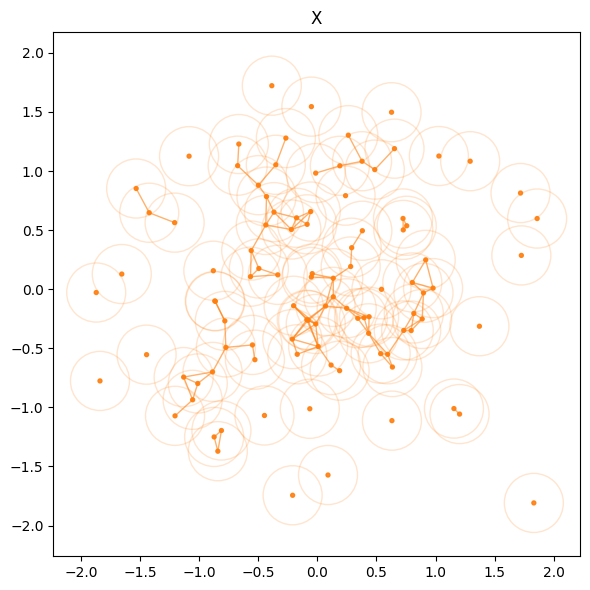

In [182]:
X = data2[['a', 'b']].values
plot_rips_complex(X, R=0.25,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


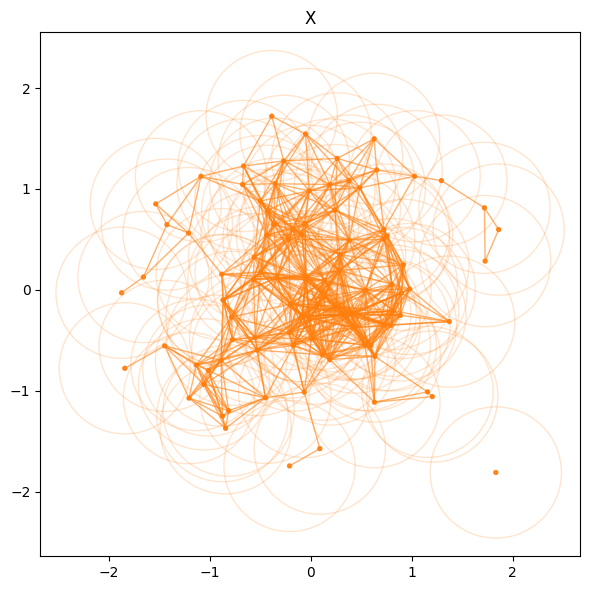

In [183]:
X = data2[['a', 'b']].values
plot_rips_complex(X, R=.65,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


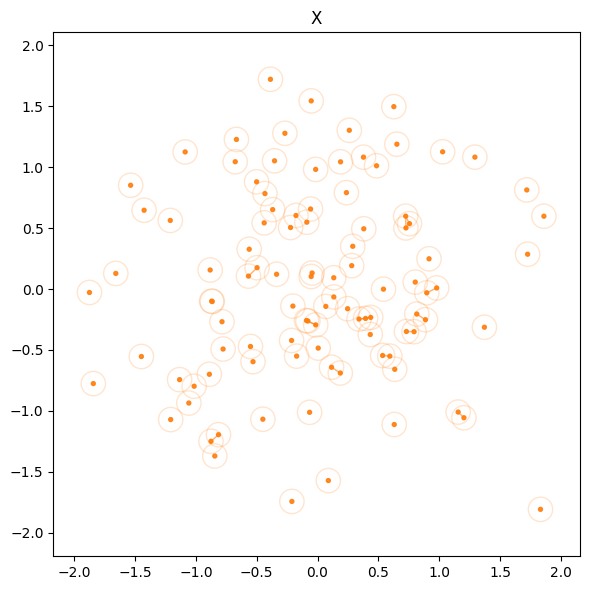

In [184]:
X = data2[['a', 'b']].values
plot_rips_complex(X, R=.1,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


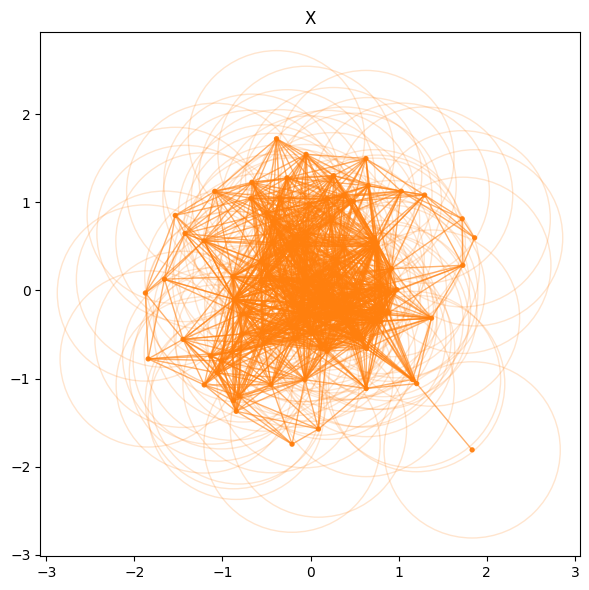

In [185]:
X = data2[['a', 'b']].values
plot_rips_complex(X, R=1,label='X',maxdim=5)

### Alpha

In [186]:
#Calculamos la fitltración de Alpha
points = data2[['a', 'b']].values
alpha_complex = gudhi.AlphaComplex(points)

#Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = alpha_complex.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 - 573 simplices - 100 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.

## Datos actividad 3

            a          b
0  -16.865905  -9.030913
1  -17.721247   9.601550
2  -19.047260   8.233957
3  -10.252216  -8.925738
4  -17.636004 -10.591064
..        ...        ...
95  -4.374102  -2.763981
96   0.835126  -0.332593
97   3.035755  -1.229515
98   3.306197  -2.045879
99  -4.613019  -2.941189

[100 rows x 2 columns]


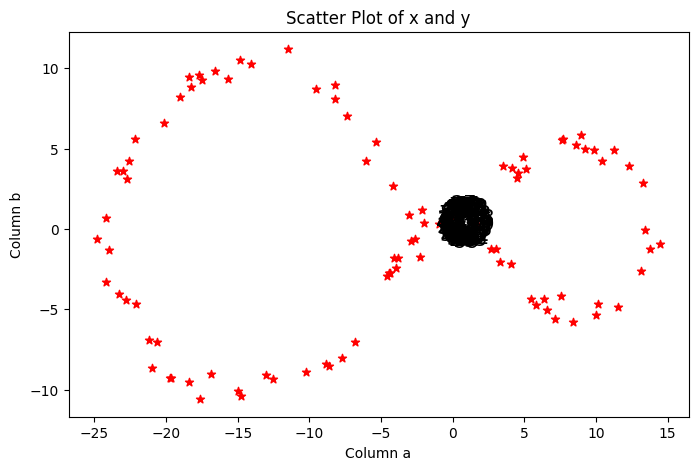

In [187]:
print(data3)
#Grafiquemos los datos
plt.figure(figsize=(8,5))
plt.scatter(data3['a'],data3['b'],c='r',marker='*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a,j.b), fontsize=15)


In [188]:
#Calculemos la matriz de Distancias Eclidianas

dist=pd.DataFrame(squareform(pdist(data3[["a","b"]]),'euclidean'),columns=data3.index.values, index=data3.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,18.652085,17.402128,6.614525,1.739863,14.260669,18.306369,4.321607,11.569415,17.888074,...,16.290179,14.500682,22.001171,14.930703,14.691244,13.975678,19.722760,21.376105,21.347234,13.682761
1,18.652085,0.000000,1.904894,19.976156,20.192793,8.254895,0.390541,19.634802,12.484377,0.957017,...,19.133768,18.310447,24.743488,18.032438,17.792009,18.194851,21.048187,23.412926,24.037804,18.142380
2,17.402128,1.904894,0.000000,19.282322,18.877845,6.350069,1.837290,18.736088,10.609183,0.980201,...,19.483963,18.505823,25.325247,18.288663,18.032462,18.337289,21.649366,24.025338,24.603904,18.254622
3,6.614525,19.976156,19.282322,0.000000,7.569256,18.198738,19.589601,2.340488,16.773912,19.449567,...,10.722151,9.037785,15.806096,9.596807,9.424855,8.515836,14.027518,15.355846,15.204046,8.222856
4,1.739863,20.192793,18.877845,7.569256,0.000000,15.356038,19.854937,5.231932,12.277479,19.404334,...,17.708982,15.928539,23.252298,16.387453,16.158448,15.399392,21.128626,22.692734,22.618487,15.103600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.975678,18.194851,18.337289,8.515836,15.399392,20.094638,17.821981,10.497571,20.578130,18.064780,...,2.314504,0.531008,8.434551,1.099036,1.000292,0.000000,5.748713,7.567071,7.713798,0.297463
96,19.722760,21.048187,21.649366,14.027518,21.128626,24.580517,20.717177,16.139055,25.680663,21.158790,...,3.435578,5.227321,3.696745,4.856351,5.124293,5.748713,0.000000,2.376392,3.006916,6.040451
97,21.376105,23.412926,24.025338,15.355846,22.692734,26.902236,23.084039,17.575301,27.885291,23.531406,...,5.362697,7.084174,1.379394,6.844837,7.130859,7.567071,2.376392,0.000000,0.859994,7.837957
98,21.347234,24.037804,24.603904,15.204046,22.618487,27.326176,23.703715,17.459071,28.184245,24.132154,...,5.618672,7.259213,0.745004,7.091216,7.381338,7.713798,3.006916,0.859994,0.000000,7.969665


In [189]:
#Calculas la filtracion de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points=data3[['a', 'b']].values, max_edge_length=20.0)

In [190]:
#Generamos el arbol de complejos simpliciales e imprimimos la informacion
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' +repr(simplex_tree.dimension())+'-'+\
    repr(simplex_tree.num_simplices())+' simplices -' +\
    repr(simplex_tree.num_vertices())+'vertices.'
print(result_str)
fmt='%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[11, 27, 40] -> 19.62
[12, 27, 40] -> 19.62
[13, 27, 40] -> 19.62
[14, 27, 40] -> 19.62
[15, 27, 40] -> 19.62
[17, 27, 40] -> 19.62
[18, 27, 40] -> 19.62
[19, 27, 40] -> 19.62
[21, 27, 40] -> 19.62
[22, 27, 40] -> 19.62
[23, 27, 40] -> 19.62
[24, 27, 40] -> 19.62
[25, 27, 40] -> 19.62
[26, 27, 40] -> 19.62
[27, 29, 40] -> 19.62
[27, 30, 40] -> 19.62
[27, 31, 40] -> 19.62
[27, 32, 40] -> 19.62
[27, 33, 40] -> 19.62
[27, 34, 40] -> 19.62
[27, 36, 40] -> 19.62
[27, 37, 40] -> 19.62
[27, 39, 40] -> 19.62
[27, 40, 41] -> 19.62
[27, 40, 42] -> 19.62
[27, 40, 43] -> 19.62
[27, 40, 44] -> 19.62
[27, 40, 45] -> 19.62
[27, 40, 99] -> 19.62
[31, 79] -> 19.62
[0, 31, 79] -> 19.62
[1, 31, 79] -> 19.62
[2, 31, 79] -> 19.62
[3, 31, 79] -> 19.62
[4, 31, 79] -> 19.62
[5, 31, 79] -> 19.62
[6, 31, 79] -> 19.62
[7, 31, 79] -> 19.62
[9, 31, 79] -> 19.62
[10, 31, 79] -> 19.62
[11, 31, 79] -> 19.62
[12, 31, 79] -> 19.62
[13, 31, 79] -> 19.62


### RIPS

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


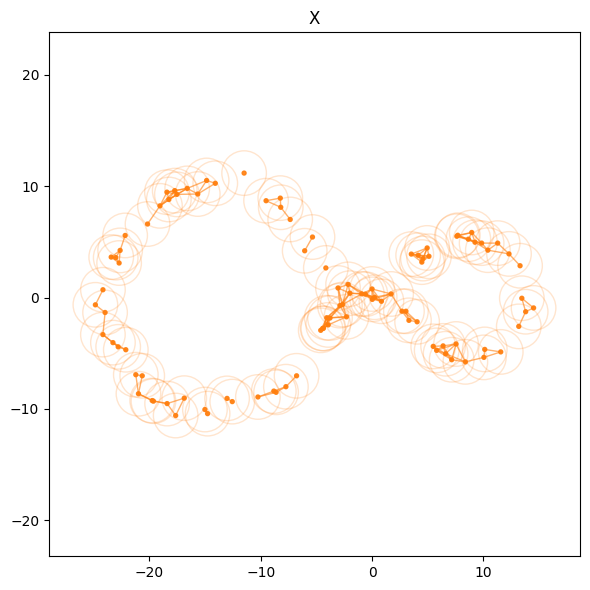

In [191]:
X = data3[['a', 'b']].values
plot_rips_complex(X, R=2,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


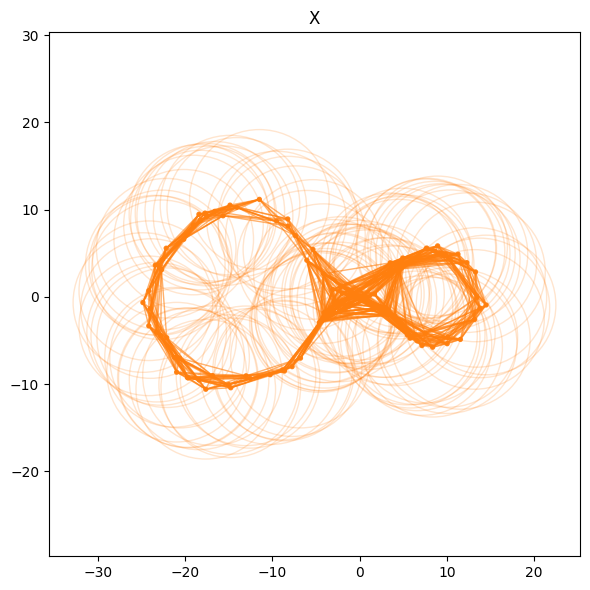

In [192]:
X = data3[['a', 'b']].values
plot_rips_complex(X, R=8,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


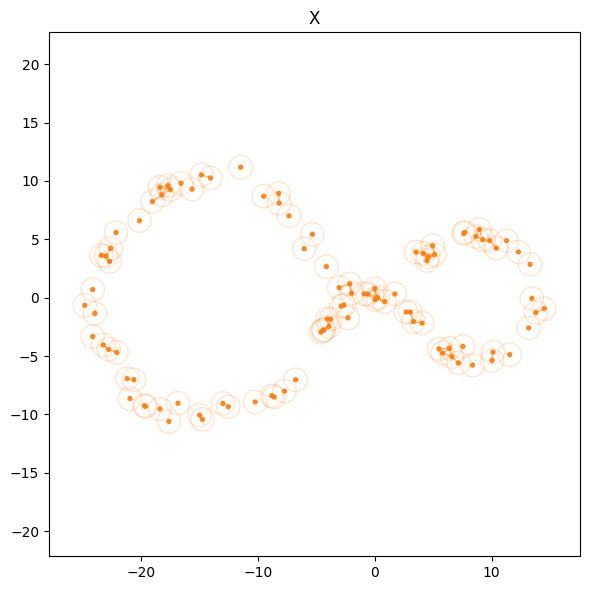

In [193]:
X = data3[['a', 'b']].values
plot_rips_complex(X, R=1,label='X',maxdim=1)

<ipython-input-172-4bdce2359549>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


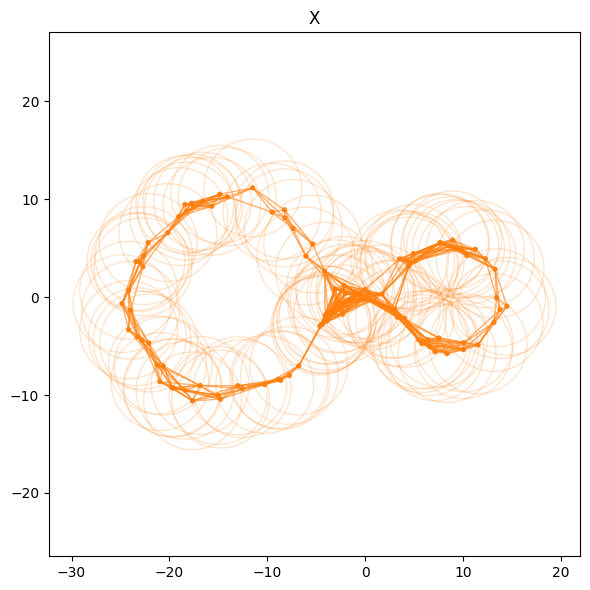

In [196]:
X = data3[['a', 'b']].values
plot_rips_complex(X, R=5,label='X',maxdim=10)

### Alpha

In [195]:
#Calculamos la fitltración de Alpha
points = data3[['a', 'b']].values
alpha_complex = gudhi.AlphaComplex(points)

#Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = alpha_complex.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 - 559 simplices - 100 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.